In [36]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense ,Dropout
from keras.optimizers import Adam
import time

In [37]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_median.csv')

In [38]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [39]:
X.shape

(1781, 7)

In [40]:
y.shape

(1781,)

In [41]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape

(1424, 7)

In [43]:
X_test.shape

(357, 7)

In [44]:
y_train.shape

(1424,)

In [45]:
y_test.shape

(357,)

In [46]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
X_train.shape

(1424, 7)

In [48]:
X_test.shape

(357, 7)

In [49]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [50]:

X_train.shape

(1424, 7, 1)

In [51]:
X_test.shape

(357, 7, 1)

In [52]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [53]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error',metrics=['mae','mse'])

In [54]:
import time

# Début du chrono
start_time_median = time.time()
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
history=model.fit(X_train, y_train, epochs=3000, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])
# Fin du chrono
end_time_median = time.time()

Streaming output truncated to the last 5000 lines.
45/45 [==============================] - 1s 12ms/step - loss: 1.3868 - mae: 1.4551 - mse: 7.7884 - val_loss: 0.6305 - val_mae: 0.6948 - val_mse: 2.1567
Epoch 502/3000
45/45 [==============================] - 0s 11ms/step - loss: 0.7132 - mae: 0.7879 - mse: 2.6997 - val_loss: 0.4502 - val_mae: 0.5527 - val_mse: 2.0595
Epoch 503/3000
45/45 [==============================] - 1s 13ms/step - loss: 0.9021 - mae: 1.0250 - mse: 5.1586 - val_loss: 0.5093 - val_mae: 0.5339 - val_mse: 0.8621
Epoch 504/3000
45/45 [==============================] - 1s 11ms/step - loss: 0.7842 - mae: 1.0044 - mse: 6.7861 - val_loss: 0.8850 - val_mae: 1.3510 - val_mse: 10.3504
Epoch 505/3000
45/45 [==============================] - 1s 12ms/step - loss: 1.1857 - mae: 1.2535 - mse: 6.6002 - val_loss: 1.3071 - val_mae: 1.5180 - val_mse: 18.3659
Epoch 506/3000
45/45 [==============================] - 1s 12ms/step - loss: 0.8887 - mae: 1.0083 - mse: 4.9284 - val_loss: 0.6

In [55]:
# Calcul de la durée d'entraînement en secondes
training_time_median = end_time_median - start_time_median
# Affichage de la durée d'entraînement
print("Le temps d'entraînement est de", training_time_median, "secondes")
# Evaluate the model
loss_median = model.evaluate(X_test, y_test)
print('Mean absolute percentege error:', loss_median[0])
print('Mean absolute error:', loss_median[1])
print('Mean squared error:', loss_median[2])

Le temps d'entraînement est de 2243.3332602977753 secondes
12/12 [==============================] - 0s 10ms/step - loss: 0.2954 - mae: 0.3404 - mse: 0.4762
Mean absolute percentege error: 0.29537642002105713
Mean absolute error: 0.34042516350746155
Mean squared error: 0.4762016236782074


In [56]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 209ms/step
Predicted WQI: 72.05128


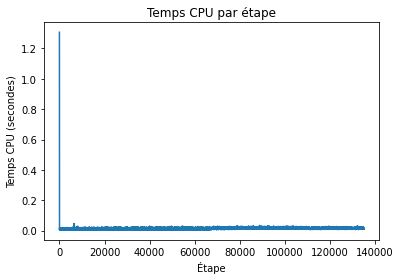

In [57]:
# Créer un graphe pour les temps CPU par epoch
import matplotlib.pyplot as plt

plt.plot(range(len(step_times)), step_times)
plt.xlabel('Étape')
plt.ylabel('Temps CPU (secondes)')
plt.title('Temps CPU par étape')
plt.show()

In [58]:
model.save('prediction_wqi_par_cnn_median_3000_epochs.h5')

# remplacer les valeurs manquantes par le **moyenne**

In [59]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_mean.csv')

In [60]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [61]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [64]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [65]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error',metrics=['mae','mse'])

In [66]:
import time

# Début du chrono
start_time_mean = time.time()
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
history_mean=model.fit(X_train, y_train, epochs=3000, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])
# Fin du chrono
end_time_mean = time.time()

Streaming output truncated to the last 5000 lines.
45/45 [==============================] - 0s 7ms/step - loss: 3.0936 - mae: 6.6413 - mse: 186.8404 - val_loss: 3.2843 - val_mae: 7.9778 - val_mse: 342.3605
Epoch 502/3000
45/45 [==============================] - 0s 8ms/step - loss: 1.9725 - mae: 4.8014 - mse: 127.3695 - val_loss: 2.3557 - val_mae: 7.0427 - val_mse: 204.3021
Epoch 503/3000
45/45 [==============================] - 0s 8ms/step - loss: 2.3665 - mae: 5.2543 - mse: 115.8919 - val_loss: 2.3989 - val_mae: 7.5785 - val_mse: 266.6800
Epoch 504/3000
45/45 [==============================] - 0s 8ms/step - loss: 2.1798 - mae: 4.5668 - mse: 90.1282 - val_loss: 1.8432 - val_mae: 4.5250 - val_mse: 114.6172
Epoch 505/3000
45/45 [==============================] - 0s 8ms/step - loss: 2.6707 - mae: 5.8683 - mse: 133.1883 - val_loss: 2.2949 - val_mae: 5.1940 - val_mse: 132.6725
Epoch 506/3000
45/45 [==============================] - 0s 8ms/step - loss: 2.0128 - mae: 4.6784 - mse: 107.9895 - 

In [67]:
# Calcul de la durée d'entraînement en secondes
training_time_mean = end_time_mean - start_time_median
# Affichage de la durée d'entraînement
print("Le temps d'entraînement est de", training_time_mean, "secondes")
# Evaluate the model
loss_mean = model.evaluate(X_test, y_test)
print('Mean absolute percentege error:', loss_mean[0])
print('Mean absolute error:', loss_mean[1])
print('Mean squared error:', loss_mean[2])


Le temps d'entraînement est de 4059.9826123714447 secondes
12/12 [==============================] - 0s 3ms/step - loss: 1.9915 - mae: 6.4694 - mse: 321.7827
Mean absolute percentege error: 1.9914829730987549
Mean absolute error: 6.469396114349365
Mean squared error: 321.7827453613281


In [68]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 182ms/step
Predicted WQI: 78.877754


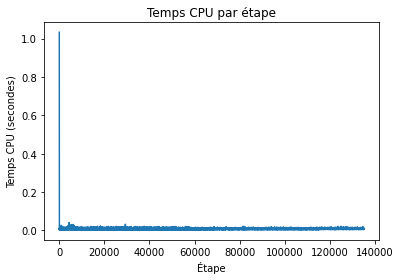

In [69]:
# Créer un graphe pour les temps CPU par epoch
import matplotlib.pyplot as plt

plt.plot(range(len(step_times)), step_times)
plt.xlabel('Étape')
plt.ylabel('Temps CPU (secondes)')
plt.title('Temps CPU par étape')
plt.show()

# remplacer les valeurs manquantes par le plus **frequent**

In [70]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_most_frequent.csv')

In [71]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [72]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [75]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [76]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error',metrics=['mae','mse'])

In [78]:
import time

# Début du chrono
start_time_frequent = time.time()
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
history_frequent=model.fit(X_train, y_train, epochs=3000, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])
# Fin du chrono
end_time_frequent = time.time()

Streaming output truncated to the last 5000 lines.
45/45 [==============================] - 0s 9ms/step - loss: 0.3709 - mae: 0.3519 - mse: 0.4572 - val_loss: 0.2992 - val_mae: 0.2235 - val_mse: 0.0982
Epoch 502/3000
45/45 [==============================] - 0s 10ms/step - loss: 0.3261 - mae: 0.2912 - mse: 0.2861 - val_loss: 0.4252 - val_mae: 0.4945 - val_mse: 0.9822
Epoch 503/3000
45/45 [==============================] - 0s 10ms/step - loss: 0.3642 - mae: 0.3415 - mse: 0.4514 - val_loss: 0.2276 - val_mae: 0.2564 - val_mse: 0.1671
Epoch 504/3000
45/45 [==============================] - 0s 10ms/step - loss: 0.3295 - mae: 0.3057 - mse: 0.2973 - val_loss: 0.2920 - val_mae: 0.3976 - val_mse: 0.7880
Epoch 505/3000
45/45 [==============================] - 0s 11ms/step - loss: 0.5291 - mae: 0.5401 - mse: 1.0541 - val_loss: 1.2306 - val_mae: 1.5567 - val_mse: 7.9967
Epoch 506/3000
45/45 [==============================] - 0s 9ms/step - loss: 0.4416 - mae: 0.4380 - mse: 0.8362 - val_loss: 0.2389 

In [79]:
# Calcul de la durée d'entraînement en secondes
training_time_frequent = end_time_frequent - start_time_frequent
# Affichage de la durée d'entraînement
print("Le temps d'entraînement est de", training_time_frequent, "secondes")
# Evaluate the model
loss_frequent = model.evaluate(X_test, y_test)
print('Mean absolute percentege error:', loss_frequent[0])
print('Mean absolute error:', loss_frequent[1])
print('Mean squared error:', loss_frequent[2])

Le temps d'entraînement est de 1702.0522968769073 secondes
12/12 [==============================] - 0s 3ms/step - loss: 0.1108 - mae: 0.1772 - mse: 0.1843
Mean absolute percentege error: 0.11080119758844376
Mean absolute error: 0.17720574140548706
Mean squared error: 0.18433591723442078


In [80]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 240ms/step
Predicted WQI: 71.92853


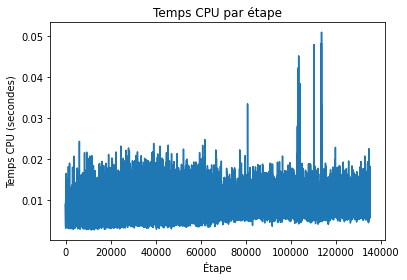

In [81]:
# Créer un graphe pour les temps CPU par epoch
import matplotlib.pyplot as plt

plt.plot(range(len(step_times)), step_times)
plt.xlabel('Étape')
plt.ylabel('Temps CPU (secondes)')
plt.title('Temps CPU par étape')
plt.show()

In [82]:
model.save('prediction_wqi_par_cnn_frequent_3000_epochs.h5')

# remplacer les valeurs manquantes par **le moyenne de chaque state**

In [83]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_mean_state.csv')

In [84]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [85]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [88]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [89]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error',metrics=['mae','mse'])

In [120]:
import time

# Début du chrono
start_time_mean_state = time.time()
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
history_mean_state=model.fit(X_train, y_train, epochs=3000, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])
# Fin du chrono
end_time_mean_state = time.time()

Streaming output truncated to the last 5000 lines.
42/42 [==============================] - 0s 10ms/step - loss: 0.3128 - mae: 0.4114 - mse: 0.9831 - val_loss: 1.0788 - val_mae: 1.1290 - val_mse: 2.4896
Epoch 502/3000
42/42 [==============================] - 0s 10ms/step - loss: 0.3797 - mae: 0.4552 - mse: 0.9228 - val_loss: 0.3109 - val_mae: 0.4116 - val_mse: 0.7864
Epoch 503/3000
42/42 [==============================] - 0s 9ms/step - loss: 0.3322 - mae: 0.4003 - mse: 0.7023 - val_loss: 0.2172 - val_mae: 0.2848 - val_mse: 0.4300
Epoch 504/3000
42/42 [==============================] - 0s 9ms/step - loss: 0.3162 - mae: 0.3946 - mse: 0.9101 - val_loss: 0.3430 - val_mae: 0.2829 - val_mse: 0.2075
Epoch 505/3000
42/42 [==============================] - 0s 9ms/step - loss: 0.3920 - mae: 0.4518 - mse: 0.8210 - val_loss: 0.3948 - val_mae: 0.4156 - val_mse: 0.7173
Epoch 506/3000
42/42 [==============================] - 0s 10ms/step - loss: 0.4129 - mae: 0.4945 - mse: 1.3334 - val_loss: 0.3653 -

In [121]:
# Calcul de la durée d'entraînement en secondes
training_time_mean_state = end_time_mean_state - start_time_mean_state
# Affichage de la durée d'entraînement
print("Le temps d'entraînement est de", training_time_mean_state, "secondes")
# Evaluate the model
loss_mean_state = model.evaluate(X_test, y_test)
print('Mean absolute percentege error:', loss_mean_state[0])
print('Mean absolute error:', loss_mean_state[1])
print('Mean squared error:', loss_mean_state[2])

Le temps d'entraînement est de 1522.0606853961945 secondes
11/11 [==============================] - 0s 3ms/step - loss: 0.1405 - mae: 0.1762 - mse: 0.1358
Mean absolute percentege error: 0.14048925042152405
Mean absolute error: 0.1762092113494873
Mean squared error: 0.13580545783042908


In [122]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 57ms/step
Predicted WQI: 72.03249


In [123]:
model.save('prediction_wqi_par_cnn_mean_state_3000_epochs.h5')

*comparaison*

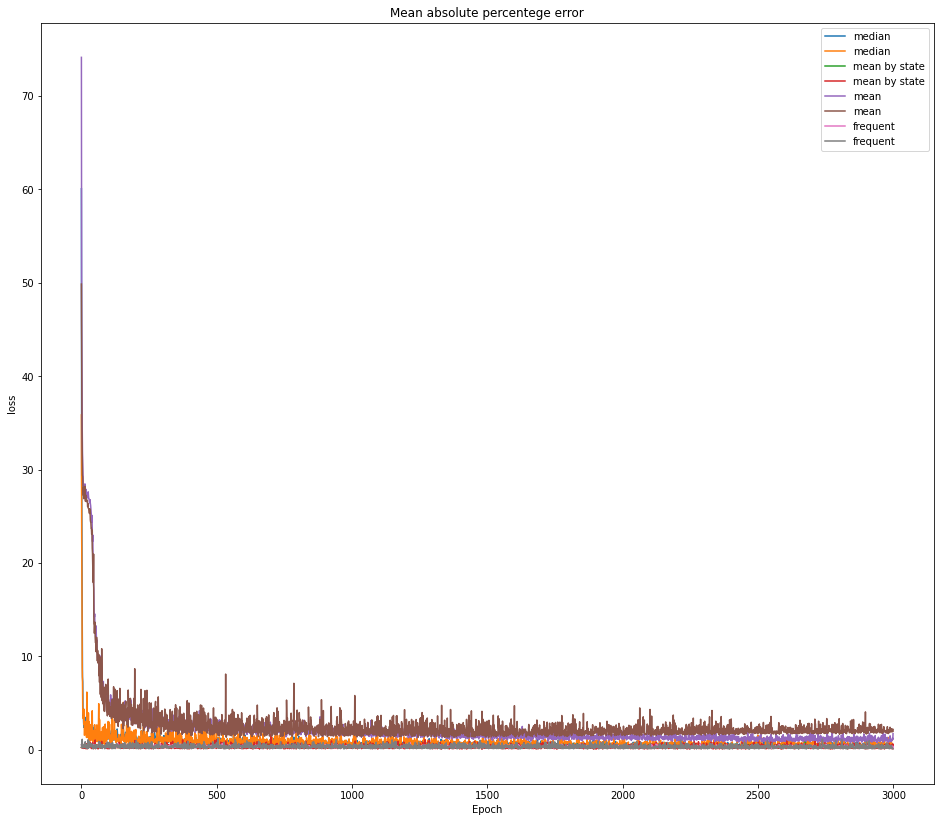

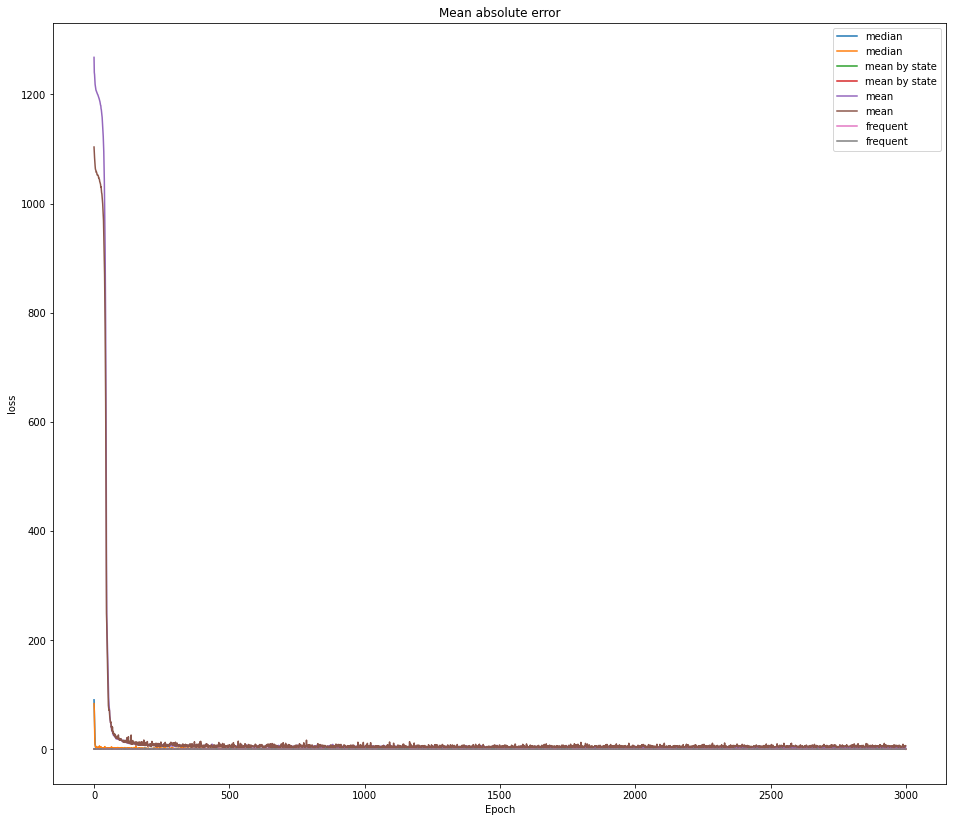

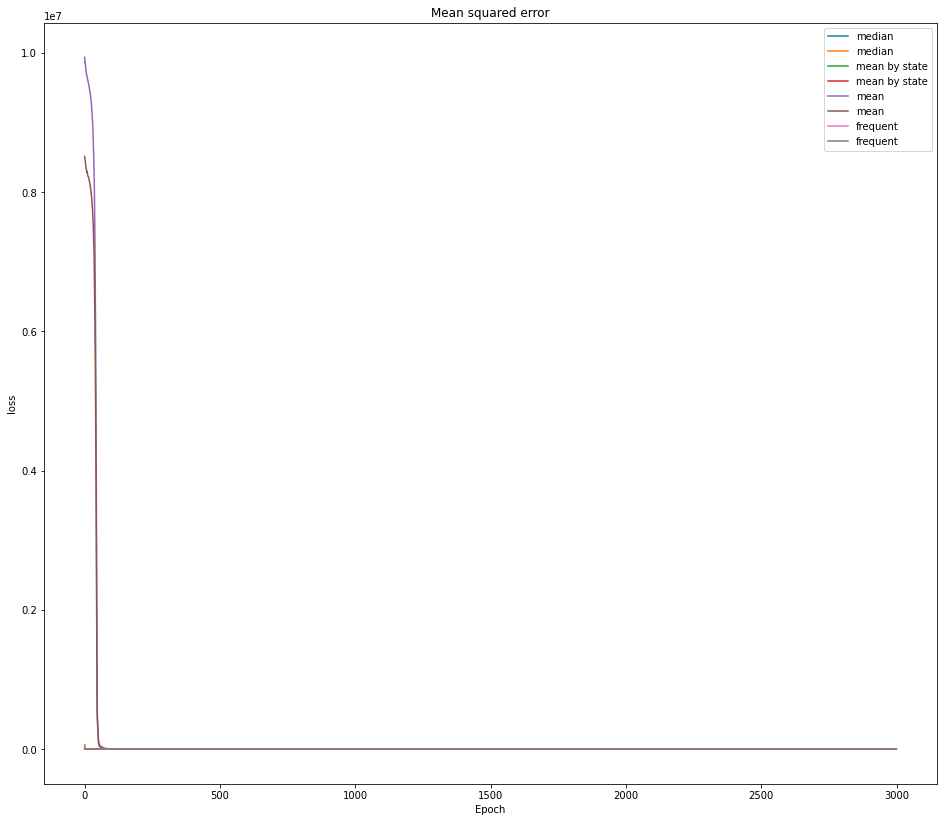

In [124]:
# Afficher les graphes d'accuracy et loss selon l'epoch
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history.history['loss'], label='median')
plt.plot(history.history['val_loss'], label='median')
plt.plot(history_mean_state.history['loss'], label='mean by state')
plt.plot(history_mean_state.history['val_loss'], label='mean by state')
plt.plot(history_mean.history['loss'], label='mean')
plt.plot(history_mean.history['val_loss'], label='mean')
plt.plot(history_frequent.history['loss'], label='frequent')
plt.plot(history_frequent.history['val_loss'], label='frequent')
plt.title('Mean absolute percentege error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history.history['mae'], label='median')
plt.plot(history.history['val_mae'], label='median')
plt.plot(history_mean_state.history['mae'], label='mean by state')
plt.plot(history_mean_state.history['val_mae'], label='mean by state')
plt.plot(history_mean.history['mae'], label='mean')
plt.plot(history_mean.history['val_mae'], label='mean')
plt.plot(history_frequent.history['mae'], label='frequent')
plt.plot(history_frequent.history['val_mae'], label='frequent')
plt.title('Mean absolute error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history.history['mse'], label='median')
plt.plot(history.history['val_mse'], label='median')
plt.plot(history_mean_state.history['mse'], label='mean by state')
plt.plot(history_mean_state.history['val_mse'], label='mean by state')
plt.plot(history_mean.history['mse'], label='mean')
plt.plot(history_mean.history['val_mse'], label='mean')
plt.plot(history_frequent.history['mse'], label='frequent')
plt.plot(history_frequent.history['val_mse'], label='frequent')
plt.title('Mean squared error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()


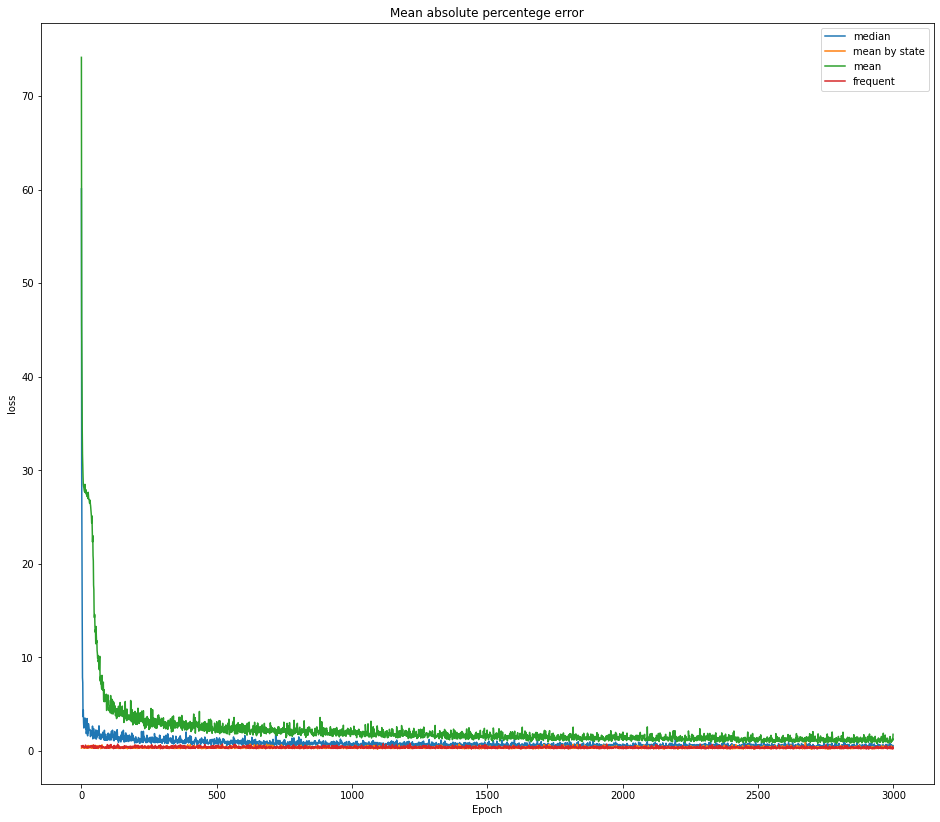

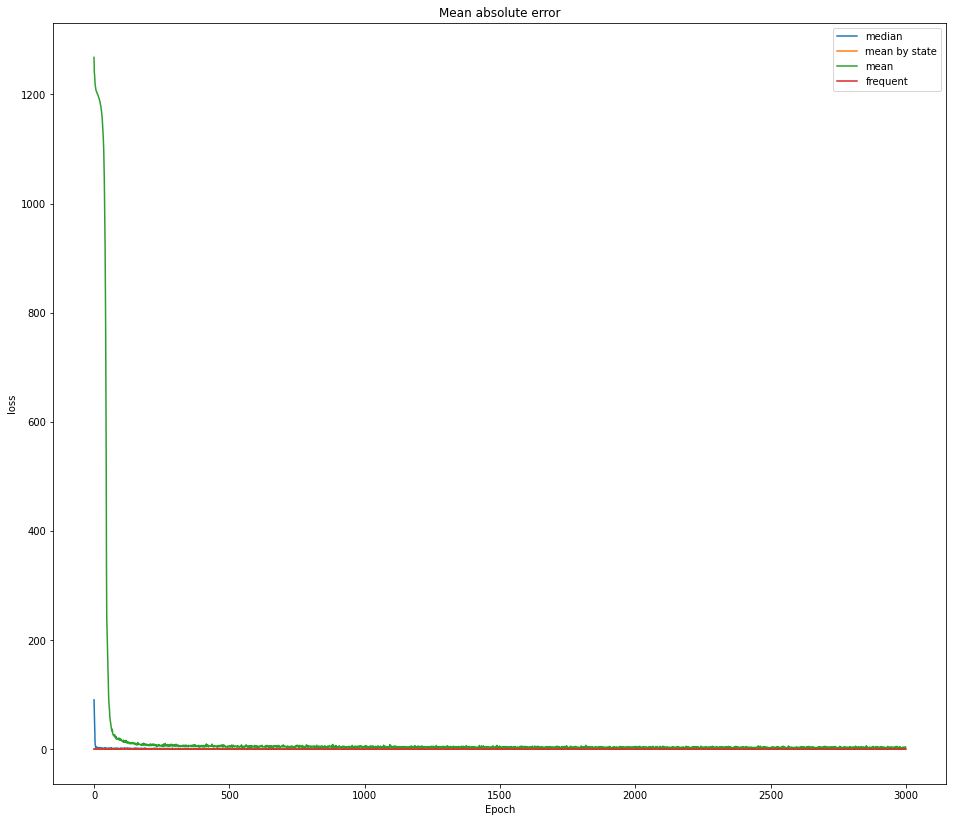

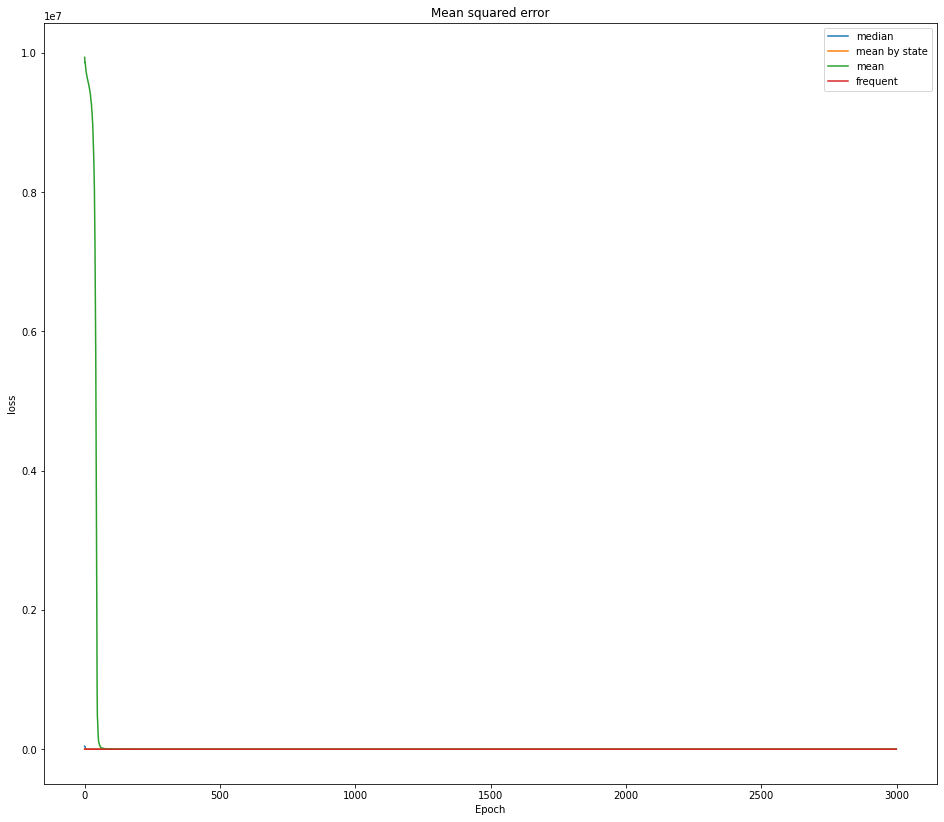

In [125]:
# Afficher les graphes d'accuracy et loss selon l'epoch
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history.history['loss'], label='median')
plt.plot(history_mean_state.history['loss'], label='mean by state')
plt.plot(history_mean.history['loss'], label='mean')
plt.plot(history_frequent.history['loss'], label='frequent')
plt.title('Mean absolute percentege error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history.history['mae'], label='median')
plt.plot(history_mean_state.history['mae'], label='mean by state')
plt.plot(history_mean.history['mae'], label='mean')
plt.plot(history_frequent.history['mae'], label='frequent')
plt.title('Mean absolute error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history.history['mse'], label='median')
plt.plot(history_mean_state.history['mse'], label='mean by state')
plt.plot(history_mean.history['mse'], label='mean')
plt.plot(history_frequent.history['mse'], label='frequent')
plt.title('Mean squared error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()


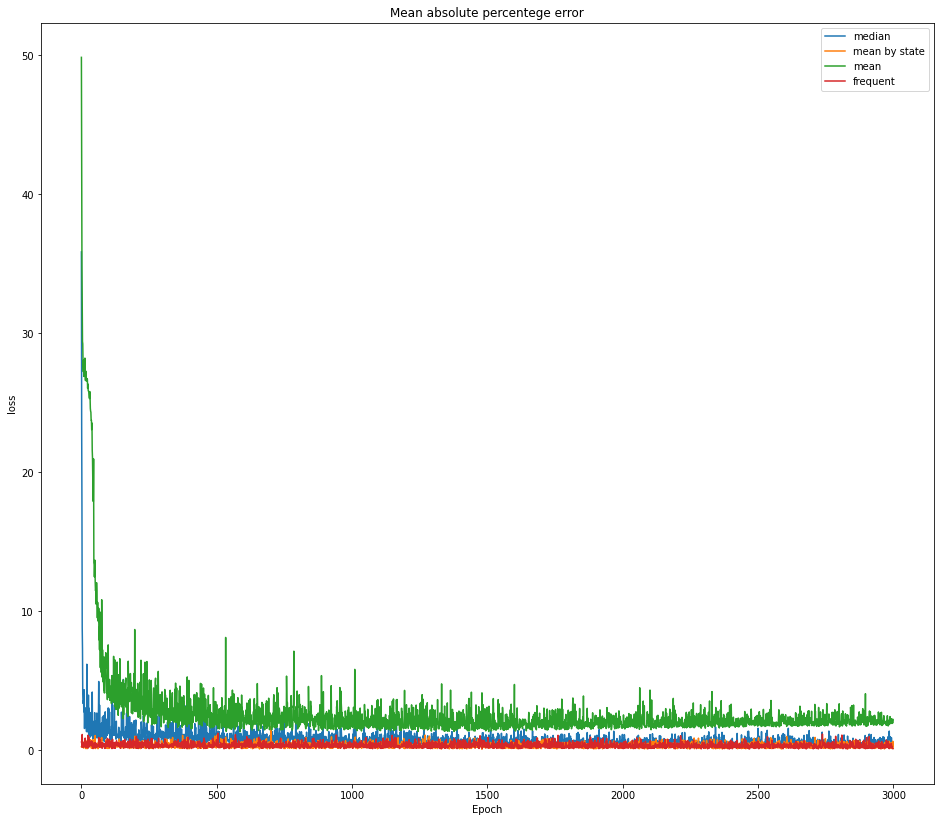

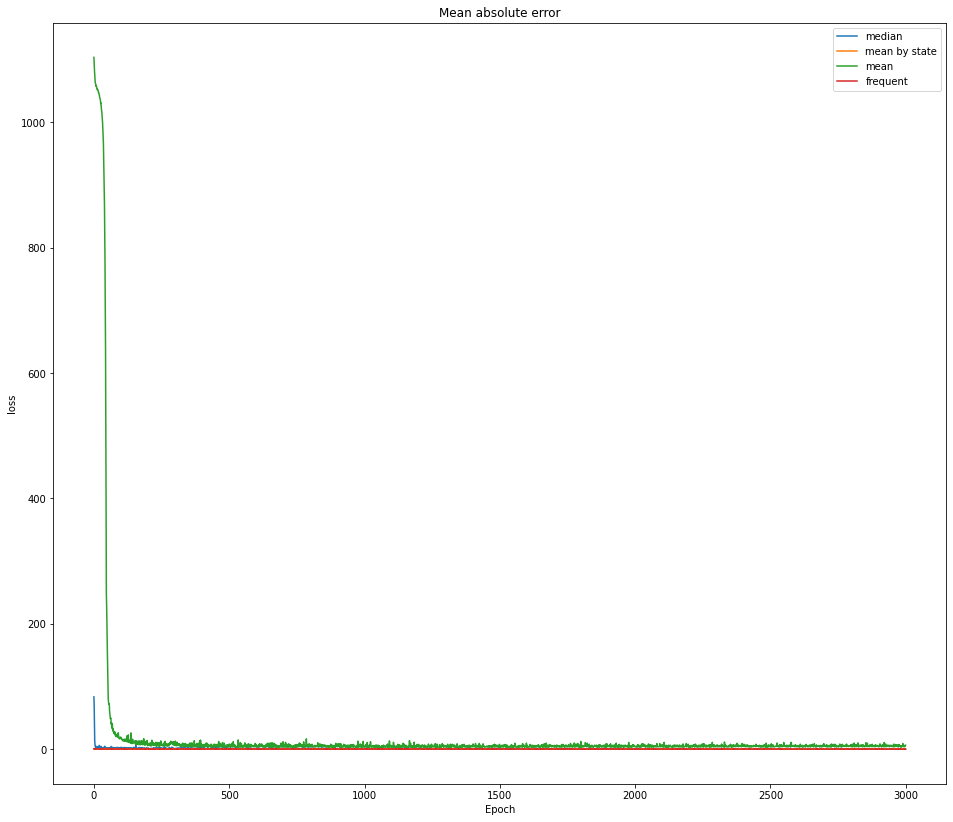

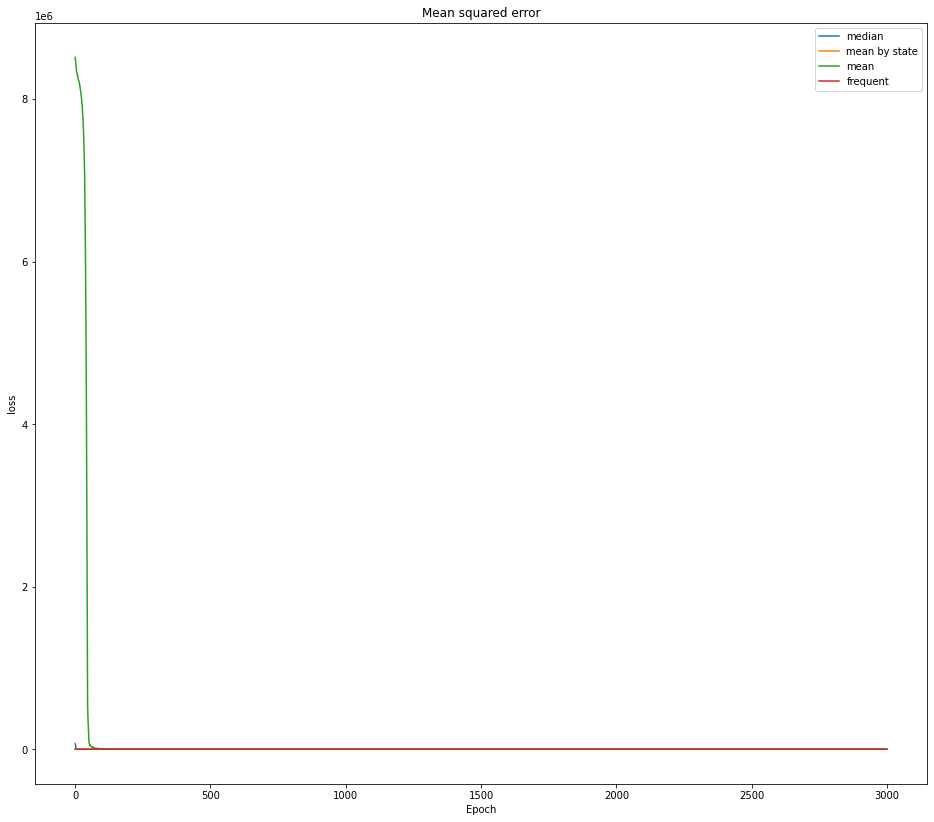

In [126]:
# Afficher les graphes d'accuracy et loss selon l'epoch
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history.history['val_loss'], label='median')
plt.plot(history_mean_state.history['val_loss'], label='mean by state')
plt.plot(history_mean.history['val_loss'], label='mean')
plt.plot(history_frequent.history['val_loss'], label='frequent')
plt.title('Mean absolute percentege error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history.history['val_mae'], label='median')
plt.plot(history_mean_state.history['val_mae'], label='mean by state')
plt.plot(history_mean.history['val_mae'], label='mean')
plt.plot(history_frequent.history['val_mae'], label='frequent')
plt.title('Mean absolute error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history.history['val_mse'], label='median')
plt.plot(history_mean_state.history['val_mse'], label='mean by state')
plt.plot(history_mean.history['val_mse'], label='mean')
plt.plot(history_frequent.history['val_mse'], label='frequent')
plt.title('Mean squared error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()


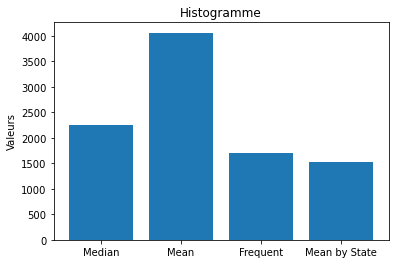

In [2]:
import matplotlib.pyplot as plt

# Données
median = 2243.3332602977753
mean = 4059.9826123714447
frequent = 1702.0522968769073
mean_by_state = 1522.0606853961945

# Création de l'histogramme
fig, ax = plt.subplots()
ax.bar(['Median', 'Mean', 'Frequent', 'Mean by State'], [median, mean, frequent, mean_by_state])
ax.set_ylabel('Valeurs')
ax.set_title('Histogramme')

plt.show()
